In [1]:
%pip install --upgrade pip
%pip install --upgrade diffusers transformers accelerate peft


  Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 2.0 MB/s eta 0:00:0000:01
  Using cached huggingface_hub-0.19.4-py3-none-any.whl.metadata (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 28.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.0 MB/s eta 0:00:0000:01
   ━━━━━

In [4]:
import torch
from diffusers import LCMScheduler, AutoPipelineForText2Image

model_id = "stabilityai/stable-diffusion-xl-base-1.0"
adapter_id = "latent-consistency/lcm-lora-sdxl"

pipe = AutoPipelineForText2Image.from_pretrained(model_id, torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")

# load and fuse lcm lora
pipe.load_lora_weights(adapter_id)
pipe.fuse_lora()

prompt = "A dog on a mountain"

# disable guidance_scale by passing 0
image = pipe(prompt=prompt, num_inference_steps=4, guidance_scale=0).images[0]


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


pytorch_lora_weights.safetensors:   0%|          | 0.00/394M [00:00<?, ?B/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [5]:
prompt = "The trading caravan was travelling through the jungle when they were attacked by bandits. The traders were able to fight back and take away the bandits' loot. The trader's daughter was happy to hear the news and she was safe behind the protective leaves of the caravan."
# disable guidance_scale by passing 0
image = pipe(prompt=prompt, num_inference_steps=4, guidance_scale=0).images[0]

  0%|          | 0/4 [00:00<?, ?it/s]

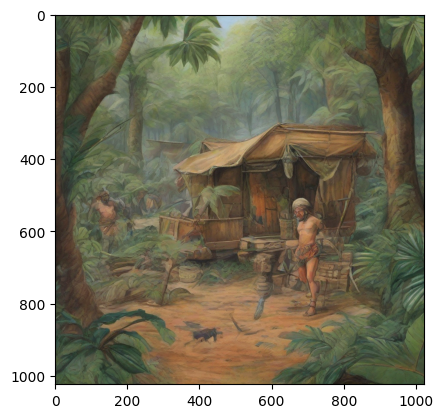

In [6]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="Falconsai/text_summarization")

ARTICLE = """
Once upon a time there was a small firetruck, who lived in the city. Every day he would wake up early, ready to serve the city and help put out fires. He loved his job and was always the first one to arrive at the station.One day, the firetruck and his crew got a call that a large fire had broken out at a nearby forest. They quickly rushed to the scene and immediately began to put out the fire. The fire was so big that the crew had to work non-stop all night to finally get it under control. The firetruck was exhausted, but still happy that he could help save the forest. As a reward, the mayor of the city presented him with a shiny new badge for his service. From then on, the firetruck was the most respected firetruck in the city. Every day, he would proudly wear his badge and go about his job, helping put out fires and saving lives. He was a true hero, and a great example of how one small firetruck can make a big difference.

"""
print(summarizer(ARTICLE, max_length=20, min_length=10, do_sample=False))


[{'summary_text': 'The firetruck was exhausted, but still happy that he could help save the forest .'}]


In [ ]:
prompt = "The firetruck was exhausted, but still happy that he could help save the forest"
# disable guidance_scale by passing 0
image = pipe(prompt=prompt, num_inference_steps=4, guidance_scale=0).images[0]

  0%|          | 0/4 [00:00<?, ?it/s]

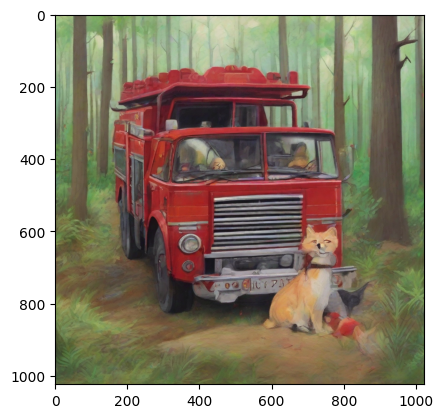

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)